# Предсказание среднего балла на ЕГЭ по математике, задача регрессии

##### Подготовка
- Подключим библиотеки

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split

import warnings

- Настроим ноутбук

In [2]:
warnings.filterwarnings('ignore')

%matplotlib inline
%config Inlinebackend.figure_format = 'svg'

- Сформируем пути до файлов

In [3]:
PATH_TO_TRAIN = 'train.csv'
PATH_TO_FINAL = 'test.csv'

##### Знакомство с датасетами

- Просмотрим __train__

In [4]:
X_y_train = pd.read_csv(PATH_TO_TRAIN)
X_y_train

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,44.0,0.0,1700.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,78.0
9996,9996,51.0,0.0,1700.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0
9997,9997,34.0,1.0,1250.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0
9998,9998,33.0,3.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0


In [5]:
X_y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


Пропусков в данных X_y_train нет
- Просмотрим сводные данные

In [6]:
X_y_train.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,64.340800
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,13.536823
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


Наблюдается один __аномальный__ показатель в средней оценке - максимальный показатель 100 баллов
- Просмотрим __test__

In [7]:
X_final = pd.read_csv(PATH_TO_FINAL)
X_final

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,19995,42.0,0.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,19996,51.0,2.0,2200.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
9997,19997,33.0,5.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,19998,48.0,0.0,1750.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


Пропусков в данных X_test нет
- Просмотрим сводные данные

In [9]:
X_final.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000
mean,14999.50000,45.97280,1.980000,1697.095000,1.709400,0.38130,0.123500,0.120100,0.056000,0.031400,0.0184
std,2886.89568,7.95628,1.783289,524.262621,0.793483,0.48573,0.329027,0.325095,0.229933,0.174405,0.1344
min,10000.00000,23.00000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,12499.75000,41.00000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,14999.50000,46.00000,2.000000,1500.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
75%,17499.25000,51.00000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0000
max,19999.00000,68.00000,10.000000,4050.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.0000


Аномальных отклонений от X_y_train не наблюдается

##### Анализируем данные

Кокие фичи имеют корреляции со стедним баллом?
- Создадим функцию для быстрого подсчета __корреяции__ для X_y_train в данном ноутбуке

In [10]:
def correlation():
    
    corr_table = X_y_train.corr()
    drop_row = corr_table.drop(['mean_exam_points','Id'], axis=0)
    sort_values = drop_row.sort_values('mean_exam_points', ascending=False)*100
    coef = round(sort_values['mean_exam_points'], 2)
    
    print(coef)

    plt.figure(figsize=(12,4))

    coef.plot(kind='barh')

    plt.title('Correlation with mean pounts', fontsize=16)
    plt.xlabel('coefficient', fontsize=14)
    
    plt.grid()

- Просмотрим сводку по корреляции

qualification          75.60
lesson_price           72.12
years_of_experience    20.54
physics                18.77
biology                 2.30
chemistry               1.78
geography               1.44
english                 1.32
history                -0.01
age                    -0.76
Name: mean_exam_points, dtype: float64


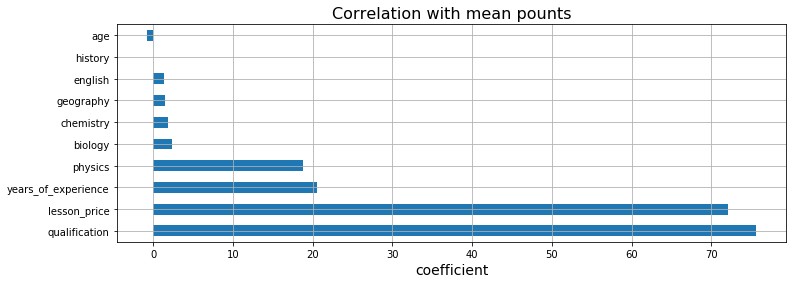

In [11]:
correlation()

Таблица показывает, что на среднюю оценку положительно коррелирует с такими фичами как:
- квалификация
- стоимость
- опыт
- физика

Так как квалификация имеет определенное число категорий, было бы интересно узнать как __категории квалификации__ распологаются друг по отношению к другу в зависимости от таких показателей как __цена__ и __средний балл__

- построим карту квалификаций по цене и среднем бале

In [12]:
first = X_y_train[X_y_train['qualification'] == 1]
second = X_y_train[X_y_train['qualification'] == 2]
third = X_y_train[X_y_train['qualification'] == 3]
four = X_y_train[X_y_train['qualification'] == 4]

In [13]:
title_setup = {'fontsize': 16}
label_setup = {'fontsize': 14}

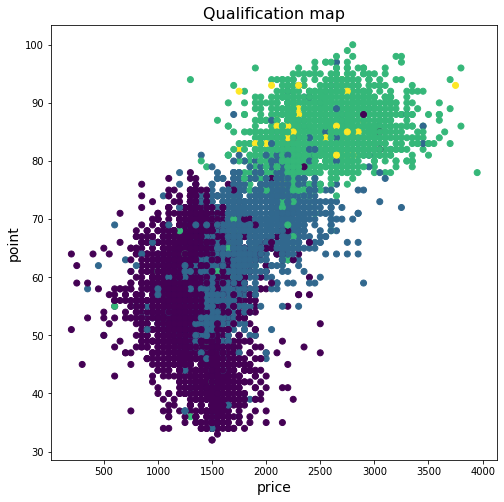

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(
    X_y_train['lesson_price'], 
    X_y_train['mean_exam_points'], 
    c=X_y_train['qualification']
)

plt.title('Qualification map', fontdict=title_setup)

plt.xlabel('price', fontdict=label_setup)
plt.ylabel('point', fontdict=label_setup)

plt.show()

На карте видно, что категории имеют определенные зоны, и по мере __повышения квалификации__ повышается __цена__ и средний __балл__<br>
- Посмотрим распределение квалификаций в на бинах в разных предметах

In [15]:
physics = X_y_train[X_y_train['physics'] == 1]
biology = X_y_train[X_y_train['biology'] == 1]
chemistry = X_y_train[X_y_train['chemistry'] == 1]
geography = X_y_train[X_y_train['geography'] == 1]
english = X_y_train[X_y_train['english'] == 1]
history = X_y_train[X_y_train['history'] == 1]

In [16]:
phys_ax = physics['qualification'].value_counts()
bio_ax = biology['qualification'].value_counts()
chem_ax = chemistry['qualification'].value_counts()
geo_ax = geography['qualification'].value_counts()
eng_ax = english['qualification'].value_counts()
hist_ax = history['qualification'].value_counts()

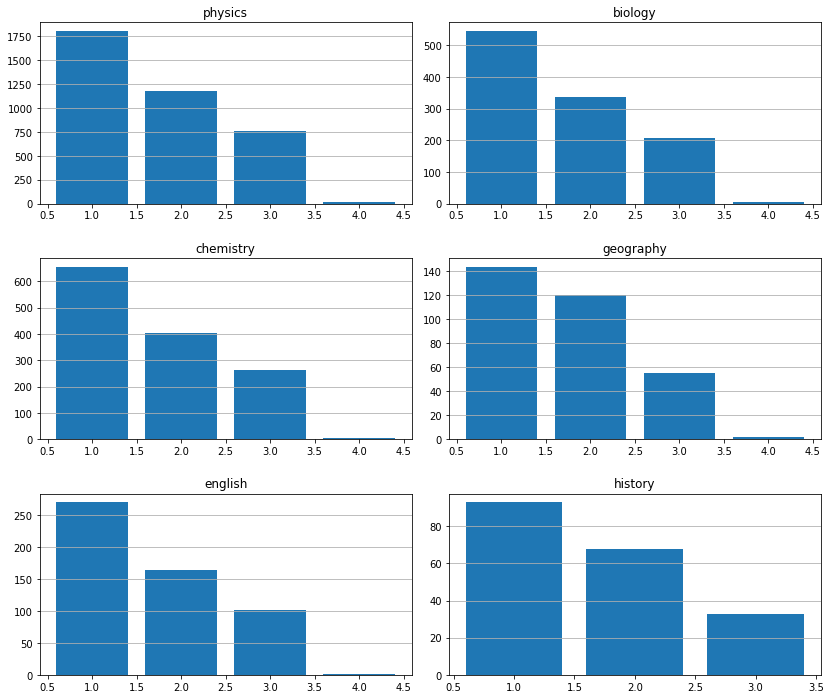

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=2)

ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()

ax1.bar(phys_ax.index, phys_ax.values)
ax1.set_title('physics')
ax1.grid(axis='y')

ax2.bar(bio_ax.index, bio_ax.values)
ax2.set_title('biology')
ax2.grid(axis='y')

ax3.bar(chem_ax.index, chem_ax.values)
ax3.set_title('chemistry')
ax3.grid(axis='y')

ax4.bar(geo_ax.index, geo_ax.values)
ax4.set_title('geography')
ax4.grid(axis='y')

ax5.bar(eng_ax.index, eng_ax.values)
ax5.set_title('english')
ax5.grid(axis='y')

ax6.bar(hist_ax.index, hist_ax.values)
ax6.set_title('history')
ax6.grid(axis='y')

fig.set_size_inches(14, 12)
plt.subplots_adjust(wspace=0.1, hspace=0.3)

##### Добавление фичей

- Создадим класс в который будем добавлять разработанные фичи

In [18]:
class Preprocessing:
    '''Класс - предобработки параметров параметров'''
        
    def age_groups(self, df):
        '''группировка по возрастам'''
        
        df = df[:]
        
        df.loc[(df['age'] <= 25), 'age_groups'] = 1
        df.loc[(df['age'] > 25) & (df['age'] <= 29), 'age_groups'] = 2
        df.loc[(df['age'] > 29) & (df['age'] <= 41), 'age_groups'] = 3
        df.loc[(df['age'] > 41) & (df['age'] <= 52), 'age_groups'] = 4
        df.loc[(df['age'] > 52), 'age_groups'] = 5
        
        return df
    
    def multidisciplinary(self, df):
        '''сумма дисциплин одного репетитора'''
        
        df = df[:]
        
        df['multidisciplinary'] = df[['physics', 'biology', 'chemistry', 'geography', 'english', 'history']].sum(axis=1)
        
        return df
    
    def zero_disciplinary(self, df):
        '''отсутстыие предмета'''
        
        df = df[:]
        
        df.loc[(df['multidisciplinary'] == 0),'zero_disciplinary'] = 1
        df.loc[(df['multidisciplinary'] > 0),'zero_disciplinary'] = 0
        
        return df
    
    def price_per_qualification(self, df):
        '''цена на уровень квалификации'''
        
        df = df[:]
        
        df['price_per_qualification'] = (df['lesson_price'] / df['qualification'])
        
        return df
    
    def coef_of_cpecialize(self, df):
        '''цена на уровень квалификации'''
        
        df = df[:]
        
        df.loc[(df['multidisciplinary'] > 0), 'coef_of_cpecialize'] =\
            df['qualification'] / df[df['multidisciplinary'] > 0]['multidisciplinary']

        df.loc[(df['multidisciplinary'] == 0), 'coef_of_cpecialize'] = 0
        
        return df
    
    def dimensionality(self, df):
        
        df = df[:]
        df = df.drop(['physics', 'biology', 'chemistry', 'geography', 'english'], axis=1)
        
        return df
    
    def pipline(self, df):
        '''последовательное выполнение'''
        
        df = df[:]
        
        # добавляем новые фичи
        df = self.age_groups(df)
        df = self.multidisciplinary(df)
        df = self.zero_disciplinary(df)
        df = self.price_per_qualification(df)
        df = self.coef_of_cpecialize(df)
        
        # удаляем спорные фичи
        df = self.dimensionality(df)
        
        return df

In [19]:
X_y_train

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,44.0,0.0,1700.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,78.0
9996,9996,51.0,0.0,1700.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0
9997,9997,34.0,1.0,1250.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0
9998,9998,33.0,3.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0


- Заворачиваем класс в переменную

In [20]:
preprocessing = Preprocessing()

1) $H_0$ = Возрастные группы репетиторов коррелируют со средней оценкой.<br>
$H_1 < 0 < H_1$

- Разобьем __возраста__ на категории

qualification          75.60
lesson_price           72.12
years_of_experience    20.54
physics                18.77
biology                 2.30
chemistry               1.78
geography               1.44
english                 1.32
history                -0.01
age                    -0.76
age_groups             -1.78
Name: mean_exam_points, dtype: float64


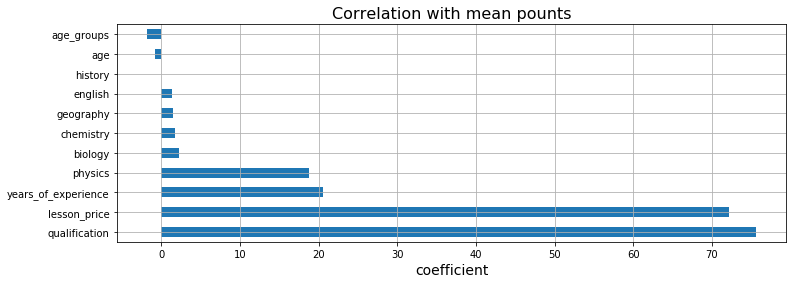

In [21]:
X_y_train = preprocessing.age_groups(X_y_train)

correlation()

$H_1 =$ Методом подбора удалось объединить __возраста__  в котегории, которые коррелируют со средней оценкой<br>
$H_0 = H_1$

2) $H_0 =$ __Мультипредметность__ репетитора коррелирует со средней оценкой.<br>
$H_1 < 0 < H_1$

qualification          75.60
lesson_price           72.12
years_of_experience    20.54
physics                18.77
multidisciplinary      14.67
biology                 2.30
chemistry               1.78
geography               1.44
english                 1.32
history                -0.01
age                    -0.76
age_groups             -1.78
Name: mean_exam_points, dtype: float64


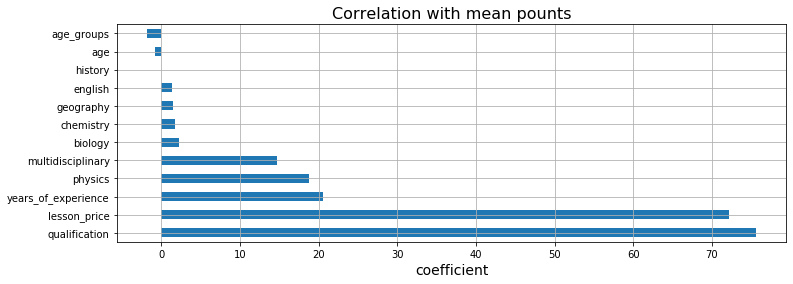

In [22]:
X_y_train = preprocessing.multidisciplinary(X_y_train)

correlation()

$H_1 = $ __мультипредметность__ репетитора коррелирует со средней оценкой<br>
$H_0 = H_1$

3) $H_0 =$ __Отсутствие специализации__ у репетитора коррелирует со средней оценкой.<br>
$H_1 < 0 < H_1$

qualification          75.60
lesson_price           72.12
years_of_experience    20.54
physics                18.77
multidisciplinary      14.67
biology                 2.30
chemistry               1.78
geography               1.44
english                 1.32
history                -0.01
age                    -0.76
age_groups             -1.78
zero_disciplinary     -15.32
Name: mean_exam_points, dtype: float64


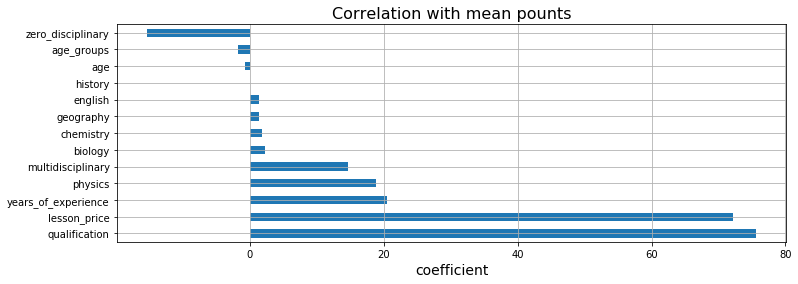

In [23]:
X_y_train = preprocessing.zero_disciplinary(X_y_train)

correlation()

$H_1 = $ __Отсутствие специализации__ коррелирует со средней оценкой<br>
$H_0 = H_1$

4) $H_0 =$ __цена за уровень квалификации__ коррелирует со средней оценкой.<br>
$H_1 < 0 < H_1$

qualification              75.60
lesson_price               72.12
years_of_experience        20.54
physics                    18.77
multidisciplinary          14.67
biology                     2.30
chemistry                   1.78
geography                   1.44
english                     1.32
history                    -0.01
age                        -0.76
age_groups                 -1.78
zero_disciplinary         -15.32
price_per_qualification   -44.50
Name: mean_exam_points, dtype: float64


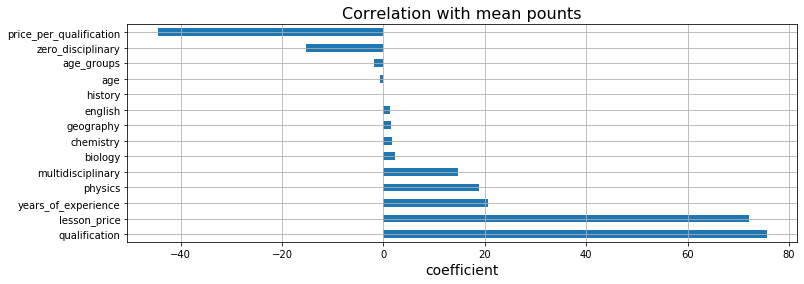

In [24]:
X_y_train = preprocessing.price_per_qualification(X_y_train)

correlation()

$H_1 = $ __цена за уровень квалификации__ коррелирует со средней оценкой<br>
$H_0 = H_1$

5) $H_0 =$ __коеффициент специализации__ коррелирует со средней оценкой.<br>
$H_1 < 0 < H_1$

qualification              75.60
lesson_price               72.12
coef_of_cpecialize         41.67
years_of_experience        20.54
physics                    18.77
multidisciplinary          14.67
biology                     2.30
chemistry                   1.78
geography                   1.44
english                     1.32
history                    -0.01
age                        -0.76
age_groups                 -1.78
zero_disciplinary         -15.32
price_per_qualification   -44.50
Name: mean_exam_points, dtype: float64


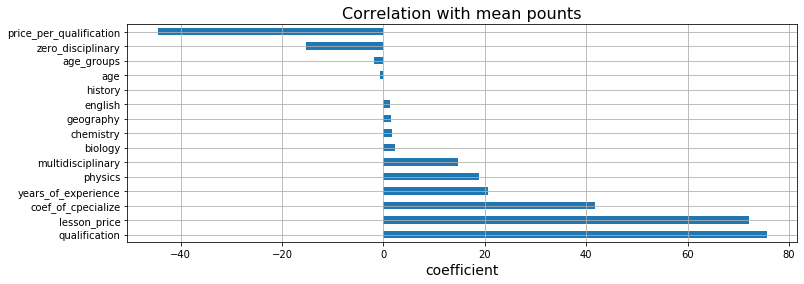

In [25]:
X_y_train = preprocessing.coef_of_cpecialize(X_y_train)

correlation()

$H_0 =$ __коеффициент специализации__ коррелирует со средней оценкой.<br>
$H_0 = H_1$

##### Понижение размерности

- Методом подбора снизим размерность матрицы по неоднозначным фичам

qualification              75.60
lesson_price               72.12
coef_of_cpecialize         41.67
years_of_experience        20.54
multidisciplinary          14.67
history                    -0.01
age                        -0.76
age_groups                 -1.78
zero_disciplinary         -15.32
price_per_qualification   -44.50
Name: mean_exam_points, dtype: float64


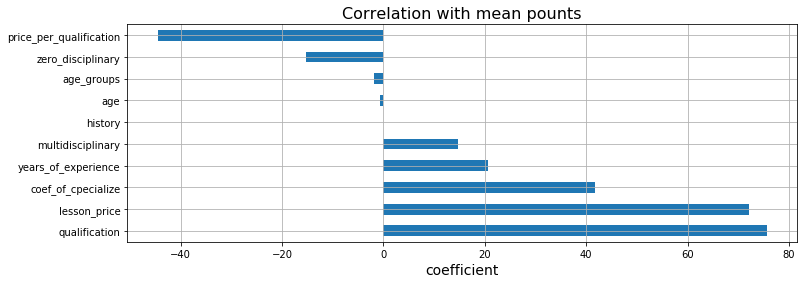

In [26]:
X_y_train = preprocessing.dimensionality(X_y_train)

correlation()

##### Обучение модели
- Переводим поле Id в индексы

In [27]:
X_y_train.set_index('Id', inplace=True)
X_final.set_index('Id', inplace=True)

- __Делим__ X_y_train на X и y

In [28]:
X = X_y_train.drop('mean_exam_points', axis=1)
y = X_y_train['mean_exam_points']

- Отбираем из выборок X и y по 20%

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Составим функции для __MSE, RMSE, MAE__ 

In [30]:
def mse(y, y_pred):
    '''сраднеквадратичная ошибка'''
    return np.mean((y - y_pred)**2)

def rmse(y, y_pred):
    
    return (np.mean((y - y_pred)**2))**(1/2)

def mae(y, y_pred):
    
    return np.mean(np.abs(y - y_pred))

- Составим класс для обучения линейной модели

In [31]:
class LinearRegression:
    
    def __init__(self, alpha: float, iters: int, criterion='mse', rand_range=None, tol=None,):
        '''предустановки'''
        self.alpha = alpha
        self.iters = iters
        self.criterion = criterion
        self.rand_range = rand_range
        self.tol = tol
        self.W = None
        
    def fit(self, X, y):
        '''обучение'''
        X = X.T
        
        if self.rand_range != None:
            np.random.seed(self.rand_range)
            
        self.W = np.random.randn(X.shape[0])
        
        error_history = []
        
        if self.criterion == 'mse':
            error = mse  
        if self.criterion == 'rmse':
            error = rmse   
        if self.criterion == 'mae':
            error = mae
        
        for i in range(self.iters):
            y_pred = self.W @ X
            
            calc_error = error(y, y_pred)

            self.W -= 2 * self.alpha * np.sum(X * (y_pred - y), axis=1) / len(y_pred)

            error_history.append(calc_error)

            if i > 2 and np.abs(calc_error - error_history[-2]) < self.tol:
                break
        
        return error_history, i+1
    
    def predict(self, X):
        '''предсказание'''
        
        y_pred = self.W @ X.T
        
        return y_pred

- Введем гиперпараметры класса

In [32]:
linear_model = LinearRegression(
    alpha=1e-7, 
    iters=200, 
    rand_range=42, 
    tol=1e-2,
    criterion='mse'
)

- __обучим__ модель и завернем результаты в переменные

In [33]:
errors, iteration = linear_model.fit(X=X_train, y=y_train)

- просмотрим прошедшее количество __итераций__

In [34]:
iteration

185

- Просмотрим последнии 5 __ошибок__ и нарисуем график ошибок

[102.72720579004209, 102.71533667054798, 102.7043092110666, 102.69406363890474, 102.68454442628531]


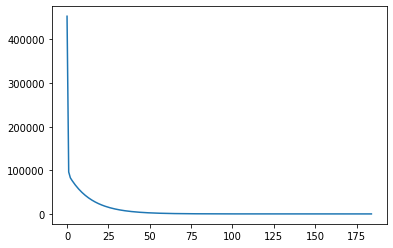

In [35]:
print(errors[-5:])

plt.plot(errors)
plt.show()

##### Предсказание результатов

- Попробуем предсказать результаты на __трейновой__ выборке

In [36]:
y_train_pred = linear_model.predict(X_train)
y_train_pred

Id
9254    54.314611
1561    61.262408
1670    59.574677
6087    53.716602
6669    58.075010
          ...    
5734    93.857560
5191    78.224372
5390    57.254346
860     48.648003
7270    50.590134
Length: 8000, dtype: float64

- Просмотрим __реальные показатели__ на трейне

In [37]:
y_train

Id
9254    60.0
1561    64.0
1670    40.0
6087    53.0
6669    61.0
        ... 
5734    94.0
5191    89.0
5390    69.0
860     48.0
7270    66.0
Name: mean_exam_points, Length: 8000, dtype: float64

- Сосставим функцию для подсчета квадратичного откланения и просмотрим сводные данные по нем

In [38]:
def std_desc(try_, pred):
    
    std = (((try_ - pred)**2)**(1/2))
    
    print(f'Наименьшее отклонение\t- {std.min()}\n'
          f'Среднее отклонение\t- {std.mean()}\n'
          f'Наибольшее отклонение\t- {std.max()}\n')

In [39]:
std_desc(y_train, y_train_pred)

Наименьшее отклонение	- 0.002124547158302903
Среднее отклонение	- 8.003953734345599
Наибольшее отклонение	- 39.53761289271388



- Теперь на __тестовой__

In [40]:
y_test_pred = linear_model.predict(X_test)
y_test_pred

Id
6252    59.304837
4684    48.613779
1731    62.439361
4742    76.321306
4521    91.029301
          ...    
6412    47.238444
8285    50.000072
7853    78.851880
1095    81.255423
6929    48.778975
Length: 2000, dtype: float64

- Просмотрим __реальные показатели__ на тесте

In [41]:
y_test

Id
6252    40.0
4684    66.0
1731    65.0
4742    80.0
4521    79.0
        ... 
6412    66.0
8285    63.0
7853    71.0
1095    85.0
6929    61.0
Name: mean_exam_points, Length: 2000, dtype: float64

In [42]:
std_desc(y_test, y_test_pred)

Наименьшее отклонение	- 0.03341535395708206
Среднее отклонение	- 7.889991663214445
Наибольшее отклонение	- 38.703887200421775



##### Предсказание значений для финальной выборки

- Модифицируем финальный датасет

In [43]:
X_final = preprocessing.pipline(X_final)

- Предскажем __среднии оценки__ на финальном датасете

In [44]:
y_final_pred = linear_model.predict(X_final)
y_final_pred

Id
10000    48.133940
10001    64.502657
10002    62.300492
10003    98.737676
10004    97.487361
           ...    
19995    55.003356
19996    80.378145
19997    41.335291
19998    65.222093
19999    72.406394
Length: 10000, dtype: float64

In [53]:
pred_final = pd.DataFrame(y_final_pred, columns=['mean_exam_points'])
pred_final.to_csv('prediction.csv', index=True)
pd.read_csv('prediction.csv')

,Id,mean_exam_points
0,10000,48.133940
1,10001,64.502657
2,10002,62.300492
3,10003,98.737676
4,10004,97.487361
...,...,...
9995,19995,55.003356
9996,19996,80.378145
9997,19997,41.335291
9998,19998,65.222093
